# 📈 Stock Price Predictor
This project uses basic machine learning to predict stock market prices based on historical data. We'll use Python libraries like **numpy**, **pandas**, **matplotlib**, **scikit-learn**, **yfinance** to fetch, visualize and model stock data.

### Set Up & Imports

Install packages if needed and import libraries for data, plotting, and modeling.

In [ ]:
!pip3 install numpy pandas matplotlib scikit-learn yfinance seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, precision_score
import yfinance as yf


### Fetch S&P 500 daily OHLCV data via `yfinance`.

In [ ]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-08 00:00:00-05:00,6875.200195,6878.270020,6827.189941,6846.509766,4757130000,0.0,0.0
2025-12-09 00:00:00-05:00,6840.609863,6864.919922,6837.430176,6840.509766,4508050000,0.0,0.0
2025-12-10 00:00:00-05:00,6833.490234,6900.669922,6824.689941,6886.680176,5526570000,0.0,0.0


### Inspect the time index and visualize the Close price to check trends and data quality.

In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-12-01 00:00:00-05:00', '2025-12-02 00:00:00-05:00',
               '2025-12-03 00:00:00-05:00', '2025-12-04 00:00:00-05:00',
               '2025-12-05 00:00:00-05:00', '2025-12-08 00:00:00-05:00',
               '2025-12-09 00:00:00-05:00', '2025-12-10 00:00:00-05:00',
               '2025-12-11 00:00:00-05:00', '2025-12-12 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24605, freq=None)

### Plot the time index to confirm it's correctly parsed and timezone-aware if necessary.

<Axes: title={'center': 'S&P 500 Closing Prices Over Time'}, xlabel='Date'>

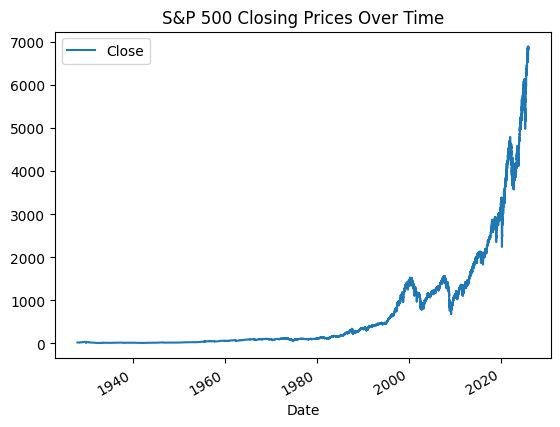

In [ ]:
sp500.plot.line(y="Close", title="S&P 500 Closing Prices Over Time", use_index=True)

### Quick charts: returns histogram, MA20/MA200 overlay, 30-day volatility, class balance, correlation, cumulative returns, drawdown, and autocorrelation.

In [ ]:
sp500['Returns'] = sp500['Close'].pct_change()*100
sp500 = sp500.dropna()

import seaborn as sns
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,4))
plt.hist(sp500['Returns'], bins=100, color='tab:blue', edgecolor='k')
plt.title('Histogram of Daily Returns (%)')
plt.xlabel('Daily Return %')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

sp500['MA20'] = sp500['Close'].rolling(20).mean()
sp500['MA200'] = sp500['Close'].rolling(200).mean()

plt.figure(figsize=(12,5))
plt.plot(sp500['Close'], label='Close', linewidth=1)
plt.plot(sp500['MA20'], label='MA 20', linewidth=1)
plt.plot(sp500['MA200'], label='MA 200', linewidth=1)
plt.title('Close with 20/200-day Moving Averages')
plt.legend()
plt.show()

sp500['Vol30'] = sp500['Returns'].rolling(30).std()
plt.figure(figsize=(12,4))
plt.plot(sp500['Vol30']*100, color='tab:orange')
plt.title('30-day Rolling Volatility (% of % returns)')
plt.ylabel('Volatility (%)')
plt.show()

plt.figure(figsize=(6,3))
sp500['Target'].value_counts().sort_index().plot(kind='bar', color=['tab:orange','tab:green'])
plt.title('Target Distribution (0=Down, 1=Up)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

corr_cols = ['Open','High','Low','Close','Volume','Returns','MA20','MA200','Vol30']
plt.figure(figsize=(8,6))
sns.heatmap(sp500[corr_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Cumulative returns and drawdown
sp500['Wealth'] = (1 + sp500['Returns']/100).cumprod()
sp500['CumReturns'] = sp500['Wealth'] - 1
plt.figure(figsize=(12,5))
plt.plot(sp500['CumReturns']*100, label='Cumulative Return (%)')
plt.title('Cumulative Returns')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.show()

sp500['Peak'] = sp500['Wealth'].cummax()
sp500['Drawdown'] = (sp500['Wealth'] - sp500['Peak']) / sp500['Peak']
plt.figure(figsize=(12,4))
plt.plot(sp500['Drawdown']*100, color='tab:red')
plt.title('Drawdown (%)')
plt.ylabel('Drawdown (%)')
plt.show()

plt.figure(figsize=(8,4))
autocorrelation_plot(sp500['Returns'])
plt.title('Autocorrelation of Daily Returns')
plt.show()

Drop unused columns and build the next-day binary target.

In [ ]:
del sp500['Dividends']
del sp500['Stock Splits']

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-12-08 00:00:00-05:00,6875.200195,6878.270020,6827.189941,6846.509766,4757130000,6840.509766,0
2025-12-09 00:00:00-05:00,6840.609863,6864.919922,6837.430176,6840.509766,4508050000,6886.680176,1
2025-12-10 00:00:00-05:00,6833.490234,6900.669922,6824.689941,6886.680176,5526570000,6901.000000,1


In [ ]:
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-12-08 00:00:00-05:00,6875.200195,6878.270020,6827.189941,6846.509766,4757130000,6840.509766,0
2025-12-09 00:00:00-05:00,6840.609863,6864.919922,6837.430176,6840.509766,4508050000,6886.680176,1
2025-12-10 00:00:00-05:00,6833.490234,6900.669922,6824.689941,6886.680176,5526570000,6901.000000,1


Baseline RF: train on all but last 100 days, test on most recent 100 days.

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
features = ["Open", "High", "Low", "Close", "Volume"]
model.fit(train[features], train["Target"])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,100
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
preds = model.predict(test[features])

In [ ]:
preds = pd.Series(preds, index=test.index)

In [ ]:
preds

Date
2025-07-24 00:00:00-04:00    1
2025-07-25 00:00:00-04:00    1
2025-07-28 00:00:00-04:00    1
2025-07-29 00:00:00-04:00    1
2025-07-30 00:00:00-04:00    1
                            ..
2025-12-08 00:00:00-05:00    1
2025-12-09 00:00:00-05:00    1
2025-12-10 00:00:00-05:00    1
2025-12-11 00:00:00-05:00    1
2025-12-12 00:00:00-05:00    1
Length: 100, dtype: int64

In [ ]:
precision_score(test["Target"], preds)

0.58

<Axes: xlabel='Date'>

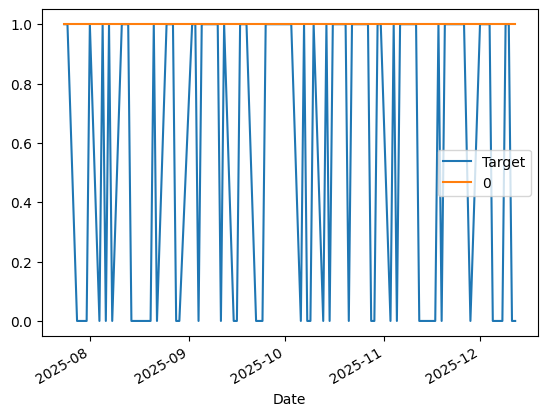

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

`predict()` and `backtest()` utilities. Note: `predict()` thresholds probabilities at 0.6 to produce binary labels.

In [ ]:
def predict(train, test, features, model):
    """Train `model` on `train` and return a DataFrame with true target and predictions for `test`.
    Returns a DataFrame with columns: ['Target', 'Predictions'] indexed by `test.index`.
    """
    model.fit(train[features], train["Target"])
    preds = model.predict(test[features])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, features, start=2500, step=250):
    """Run a rolling-window backtest starting from `start`, stepping by `step`.
    For each window, train on data[0:i] and test on data[i:i+step].
    Returns concatenated predictions for all windows.
    """
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        predictions = predict(train, test, features, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, features)

In [ ]:
predictions["Predictions"].value_counts()

Predictions
0    3903
1    2652
Name: count, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.526395173453997

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.537605
0    0.462395
Name: count, dtype: float64

Create rolling-window ratio & trend features for multiple horizons.

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [ ]:
sp500 = sp500.dropna()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-05 00:00:00-05:00,6866.319824,6895.779785,6858.290039,6870.399902,4944560000,6846.509766,0,1.000967,2.0,1.003880,4.0,1.021604,38.0,1.115586,143.0,1.382068,531.0
2025-12-08 00:00:00-05:00,6875.200195,6878.270020,6827.189941,6846.509766,4757130000,6840.509766,0,0.998258,1.0,0.999399,4.0,1.017390,38.0,1.111161,142.0,1.376659,531.0
2025-12-09 00:00:00-05:00,6840.609863,6864.919922,6837.430176,6840.509766,4508050000,6886.680176,1,0.999562,0.0,0.998199,3.0,1.015932,37.0,1.109620,142.0,1.374843,531.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, features, model):
    """Train `model`, predict probabilities, and threshold to binary predictions.
    Uses a probability threshold (0.6) to convert predicted probabilities into class labels.
    """
    model.fit(train[features], train["Target"])
    preds = model.predict_proba(test[features])[:, 1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined  

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

Predictions
0.0    4682
1.0     872
Name: count, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5756880733944955

**Conclusions & Next Steps**: This is a simple baseline; consider more metrics, time-aware CV, and other models as next steps.